### ZCA whitening

(60000, 1, 28, 28)
(60000, 1, 28, 28)


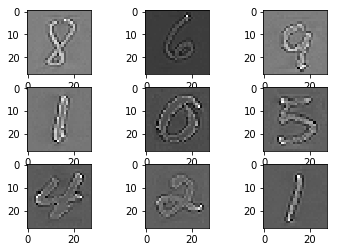

In [2]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
#K.set_image_data_format('channels_last')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation

X_train_dup = X_train
print(X_train_dup.shape)
print(X_train.shape)
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train_dup)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_dup, y_train, batch_size=128):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#### Feature standardization

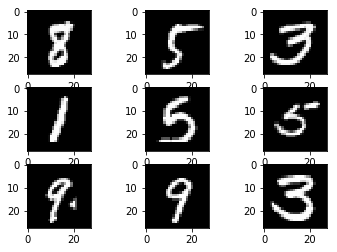

In [12]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=16):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#### Random Rotations

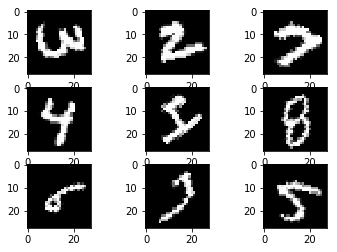

In [14]:

# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#### Random Shifts

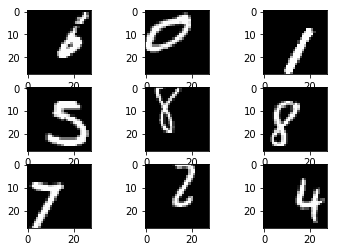

In [15]:

# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [1]:
x = [[2,4,6], [5,7,9]]
x

[[2, 4, 6], [5, 7, 9]]

In [4]:
newList = map(lambda x1: x1/2, x)

In [7]:
import numpy as np
newList = np.array(x)

In [8]:
newList


array([[2, 4, 6],
       [5, 7, 9]])

In [9]:
n = newList/2

In [10]:
n

array([[ 1. ,  2. ,  3. ],
       [ 2.5,  3.5,  4.5]])

In [7]:
print(np.arange(1, 6, 1))

[1 2 3 4 5]


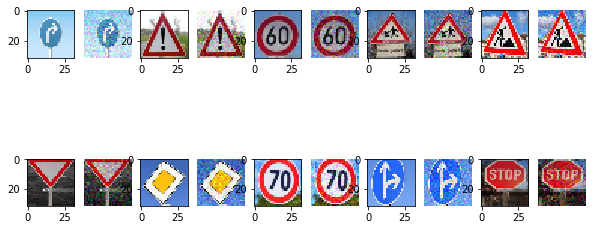

In [21]:
import cv2
import glob
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def add_gauss_noise(image):
      row,col,ch= image.shape
      print(row,col,ch)
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row, col, ch))
      gauss = gauss.reshape(row, col, ch)
      noisy = image + gauss
      return noisy

test_imgs = [img_path for img_path in glob.glob("./test_imgs/*")]
test_img = np.uint8(np.zeros((10,32,32,3)))
index = 0
for imp in (test_imgs):
    img = cv2.imread(imp, cv2.IMREAD_COLOR)
    # resize the image to 30x30
    resized_image = cv2.resize(img, (32, 32)) 
    b,g,r = cv2.split(resized_image)
    img = cv2.merge([r,g,b])
    test_img[index] = img
    index += 1

plt.figure(figsize=(10,5))
for i in range(0, 10):
    image = test_img[i]
    plt.subplot(2, 10, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    
    noisy_image =  skimage.util.random_noise(image)
    plt.subplot(2, 10, 2*i+2)
    plt.imshow(noisy_image)
    plt.axis('off')
